In [45]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = 1000 # kgs
k = 20000 # (N/m)
xi = 0.05 # damping constant
P = 750 # N, force applied to structure
f = 1 # Hz, the frequecy of the applied force
pi = math.pi 

# Properties of structures.
omega_n = math.sqrt(k/m)
f_n = 2*pi*omega_n
omega_d = omega_n*math.sqrt(1-xi**2)
omega = 2*pi*f
beta = omega/omega_n
tmax = 100
delta_t = 0.01
nPoints = tmax/delta_t

t = np.linspace(0,tmax,int(nPoints))

F_sine = P*np.sin(omega*t)

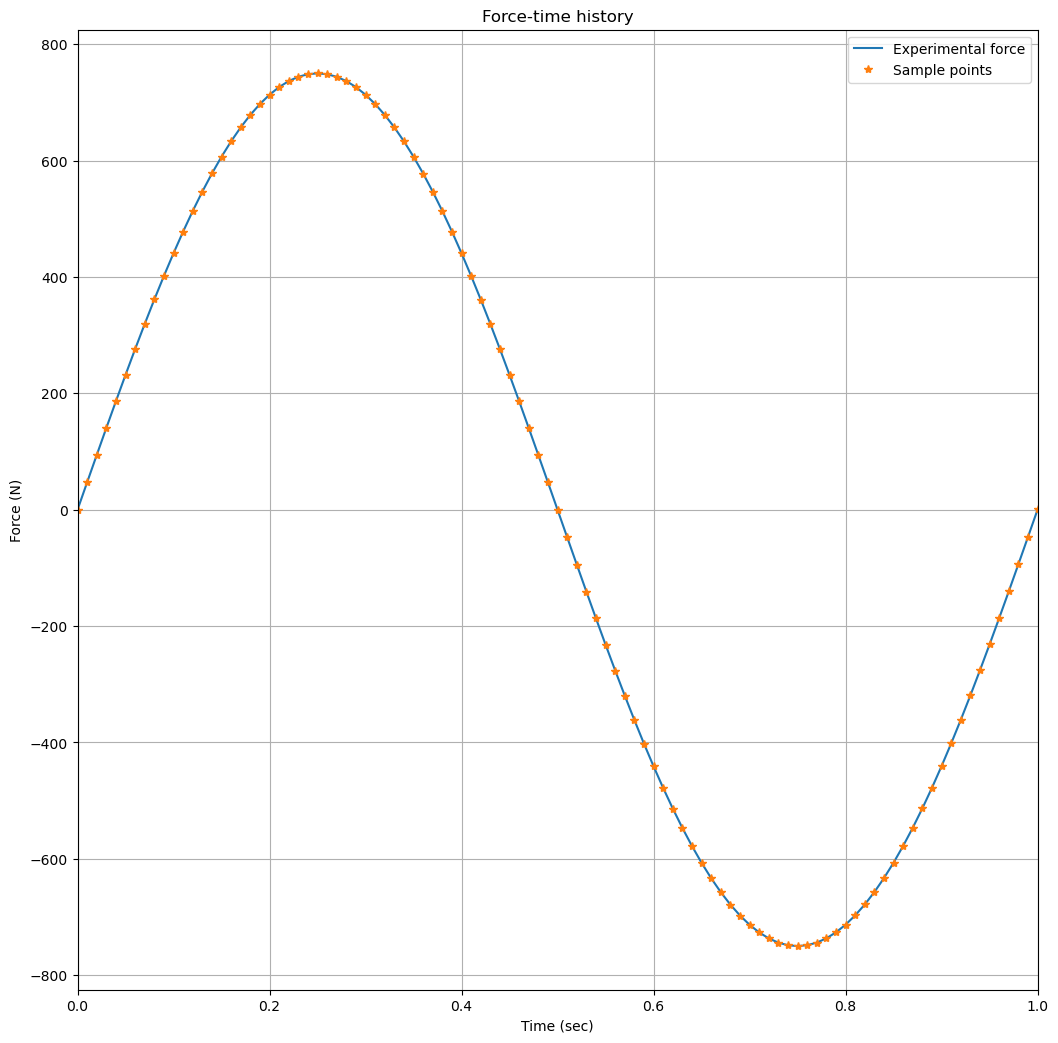

In [46]:
# Plotting of the graph
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,2])
axes.plot(t,F_sine,label='Experimental force')
axes.plot(t,F_sine,'*',label='Sample points')
axes.set_xlim([0,1])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Force (N)')
axes.set_title('Force-time history')
axes.grid()
axes.legend()
plt.show()

In [83]:
# to calculate the position and velocity of the structure at any given time.

def responseCalculation(timeVector,forceVector):
    nPoints = len(timeVector)
    delta_t = max(timeVector)/nPoints
    
    A = math.e**(-xi*omega_n*delta_t)*((xi/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t)+np.cos(omega_d*delta_t))
    B = math.e**(-xi*omega_n*delta_t)*((1/omega_d*np.sin(omega_d*delta_t)))
    C = (1/k)*(((2*xi)/(omega_n*delta_t)) + math.e**(-xi*omega_n*delta_t)*((((1-2*(xi**2))/(omega_d*delta_t))-(xi/(math.sqrt(1-(xi**2)))))*math.sin(omega_d*delta_t)-(1+((2*xi)/(omega_n*delta_t)))*np.cos(omega_d*delta_t)))
    D = (1/k)*(1-((2*xi)/(omega_n*delta_t))+math.e**(-xi*omega_n*delta_t)*(((2*(xi**2)-1)/(omega_d*delta_t))*np.sin(omega_d*delta_t)+((2*xi)/(omega_n*delta_t))*np.cos(omega_d*delta_t)))

    A1 = -math.e**(-xi*omega_n*delta_t)*((omega_n/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t))
    B1 = math.e**(-xi*omega_n*delta_t)*(np.cos(omega_d*delta_t)-((xi)/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t))
    C1 =(1/k)*(-(1/delta_t)+math.e**(-xi*omega_n*delta_t)*((((omega_n)/(math.sqrt(1-(xi**2))))+((xi)/(delta_t*math.sqrt(1-(xi**2)))))*np.sin(omega_d*delta_t)+(1/delta_t)*np.cos(omega_d*delta_t)))
    D1 =(1/k)*((1/delta_t)-(math.e**(-xi*omega_n*delta_t)/delta_t)*((xi/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t)+np.cos(omega_d*delta_t))) 
    
    u0 = 0
    v0 = 0
    position = []
    velocity = []
    
    for n,timeStep in enumerate(timeVector):
        timeStep = round(timeStep,3)
        #print(n,timeStep)
        if n < nPoints-1:
            F_n = forceVector[n]
            F_np1 = forceVector[n+1]
            #print(f'{n}: {F_n} and {F_np1}')
        else:
            F_n = forceVector[n]
            F_np1 = 0
            #print('This is the end')
            #print(f'{n}: {F_n} and {F_np1}')
    
        curr_pos = A*u0 + B*v0 + C*F_n + D*F_np1
        curr_vel = A1*u0 + B1*v0 + C1*F_n + D1*F_np1
    
        position.append(curr_pos)
        velocity.append(curr_vel)
    
        u0 = curr_pos
        v0 = curr_vel
    
    return position,velocity


In [84]:
position_points = responseCalculation(t,F_sine)[0]
velocity_points = responseCalculation(t,F_sine)[0]

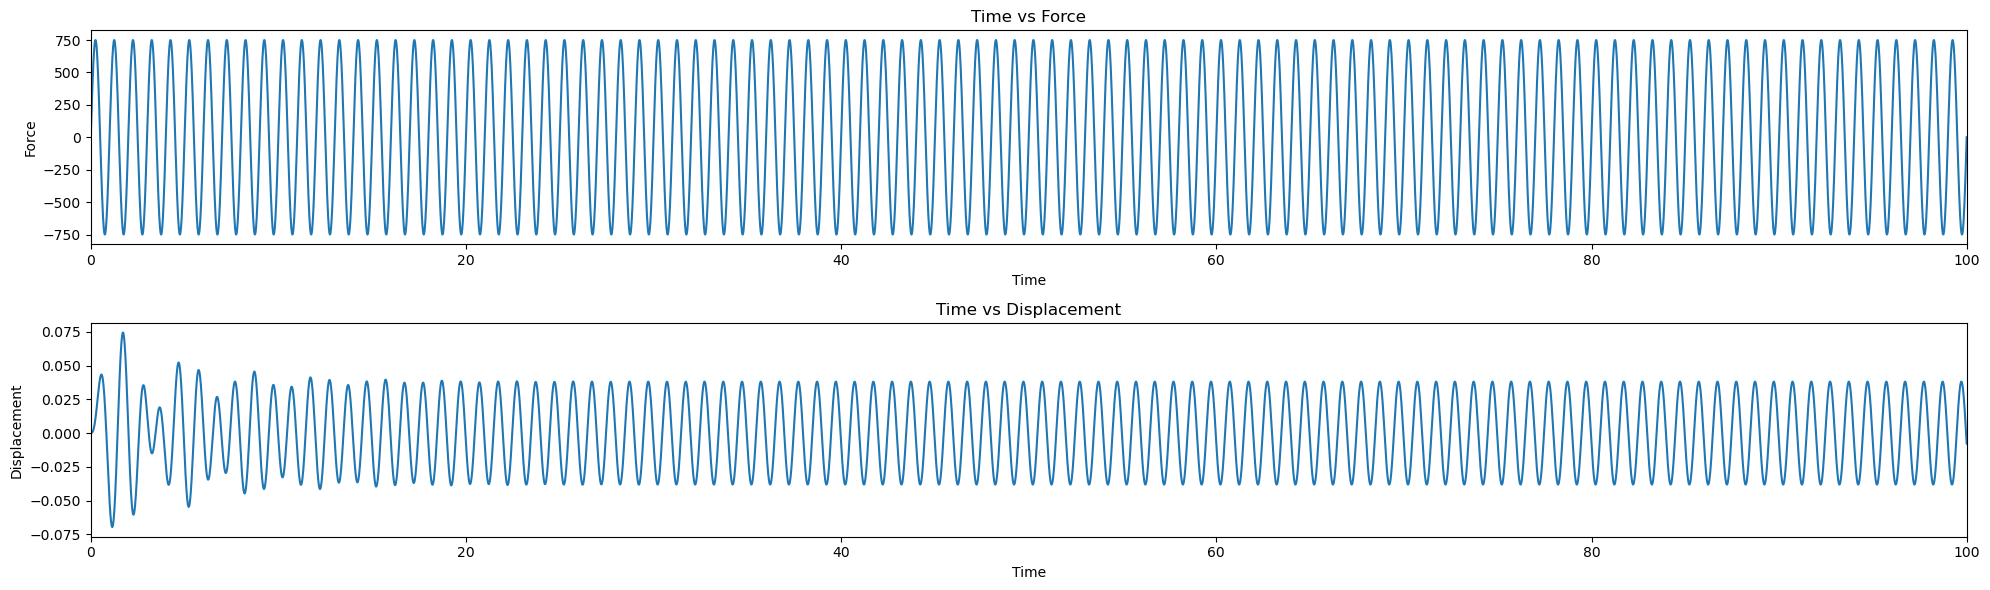

In [93]:
# plotting
import matplotlib.pyplot as plt

# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 6))

# Set x-axis limits for the first subplot
axs[0].set_xlim(0, 100)  # Replace xmin and xmax with your desired limits

# Set x-axis limits for the second subplot
axs[1].set_xlim(0, 100)  # Replace xmin and xmax with your desired limits

# Plot your data in the subplots
axs[0].plot(t, F_sine)
axs[1].plot(t, position_points)

# Add labels, titles, etc. to your subplots
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Force')
axs[0].set_title('Time vs Force')

axs[1].set_xlabel('Time')
axs[1].set_ylabel('Displacement')
axs[1].set_title('Time vs Displacement')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
